# Name: Luiselys Hernandez

## INFO 212 Midterm Project

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python


# Import necessary packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt 
# makes sure plots are displayed within notebook
%matplotlib inline 
#Adds color to plots
alpha_color = 0.5 

import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

## Data Dictionary
#### survival: 0 = No, 1 = Yes
#### pclass (a proxy for socio-economic status): 1 = 1st(upper), 2 = 2nd(middle), 3 = 3rd(lower
#### sex: male or female
#### age: age in years
#### sibsp: # of siblings and spouses aboard the Titanic
#### parch: # of parents and children aboard the Titanic
#### ticket: ticket number
#### fare: passenger fare
#### cabin: cabin number
#### [](http://)embarked (port of embarkation): C = Cherbourg, Q = Queenstown, S = Southampton

# Loading in data

In [2]:
#Reads in the train and test data.
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [3]:
#Puts both dataframes in a list.
train_test = [train, test]

# Data Characteristics

In [4]:
#Prints out the first 5 lines of the specified dataframe.
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
#Provides the numbers of rows in the specified dataframe.

len(train)

891

In [7]:
len(test)

418

In [8]:
#Provides the number of data values that are null for 
#columns in the specified dataframe.

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
#Provides descriptive statistics on the given dataframe.

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Data Cleaning and Wrangling

## Age Nulls
>**Title Extraction**

In [12]:
#Extracts only the title from the name of each passenger from both 
#dataframes.

for d in train_test:
    d['Title'] = d['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)


In [13]:
#Counts the amount of passengers with a given title.

train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Sir           1
Capt          1
Jonkheer      1
Countess      1
Mme           1
Ms            1
Lady          1
Name: Title, dtype: int64

In [14]:
#All alternative titles that mean 'Miss' are renamed to 'Miss'
#All alternative titles that mean 'Mrs' are renamed to 'Mrs'
#Titles 'Dr', 'Rev','Master','Major', 'Col', 'Dona','Don', 'Lady', 
#'Sir', 'Countess', 'Capt', and 'Jonkheer' were renamed to 'Other'

for d in train_test:
    d['Title'] = d['Title'].replace(['Mlle', 'Ms'], 'Miss')
    d['Title'] = d['Title'].replace('Mme', 'Mrs')
    d['Title'] = d['Title'].replace(['Dr', 'Rev','Master','Major', 'Col', 'Dona','Don', 'Lady', 'Sir', 'Countess', 'Capt', 'Jonkheer'], 'Other')

In [15]:
train['Title'].value_counts()

Mr       517
Miss     185
Mrs      126
Other     63
Name: Title, dtype: int64

In [16]:
test['Title'].value_counts()

Mr       240
Miss      79
Mrs       72
Other     27
Name: Title, dtype: int64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Train Age Distribution Against Title')

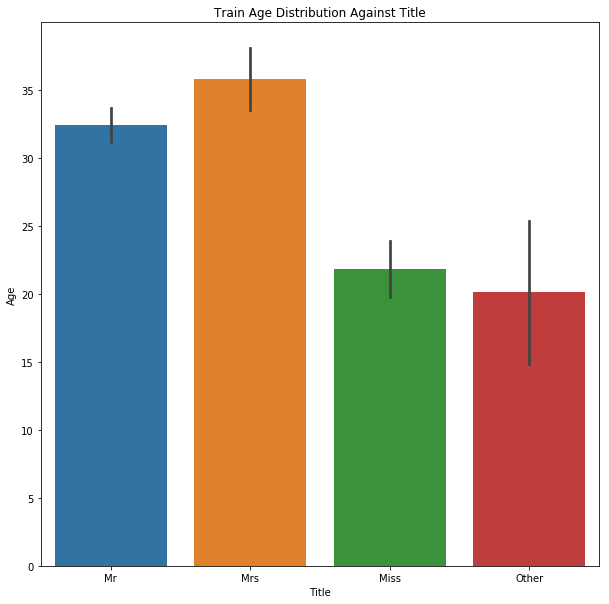

In [17]:
#Below is a plot of age distribution against title.

plt.figure(figsize=(10,10))
sns.barplot(x = "Title", y = "Age", data = train)
plt.title('Train Age Distribution Against Title')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Test Age Distribution Against Title')

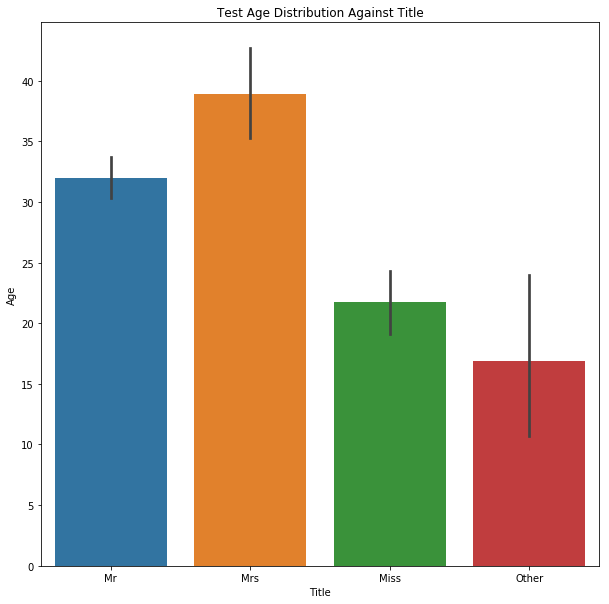

In [18]:
plt.figure(figsize=(10,10))
sns.barplot(x = "Title", y = "Age", data = test)
plt.title('Test Age Distribution Against Title')

### Finding: Mr and Mrs tend to be associated with older ages than Miss and Other. Therefore, titles will be used to determine age nulls.

In [19]:
#Fills in nulls with the median of the ages grouped by title. Median used in order to avoid 
#skew from outliers. inplace = True means the dataframe itself is altered instead of creating
#a new one.

train["Age"].fillna(train.groupby("Title")["Age"].transform('median'), inplace = True)

In [20]:
#Age nulls have now been removed.

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [21]:
test["Age"].fillna(test.groupby("Title")["Age"].transform('median'), inplace = True)

In [22]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

## Fare Nulls

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Train Fare Distribution Against Class')

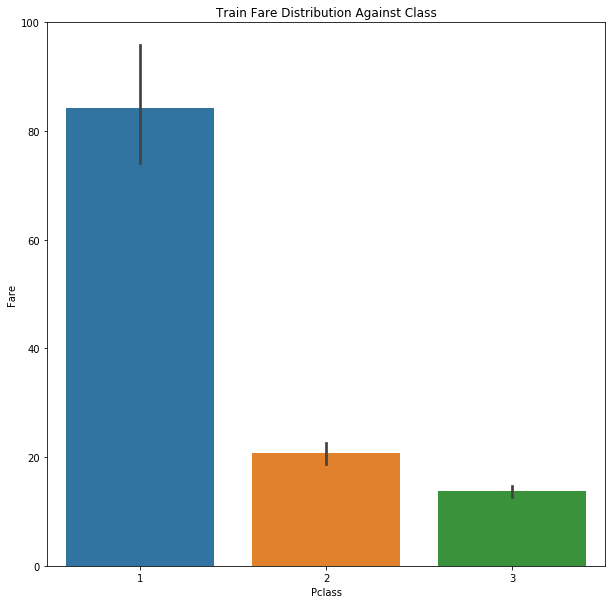

In [23]:
#The below plot shows the fare distribution against Pclass.

plt.figure(figsize=(10,10))
sns.barplot(x = "Pclass", y = "Fare", data = train)
plt.ylim(0,100)
plt.title('Train Fare Distribution Against Class')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Test Fare Distribution Against Pclass')

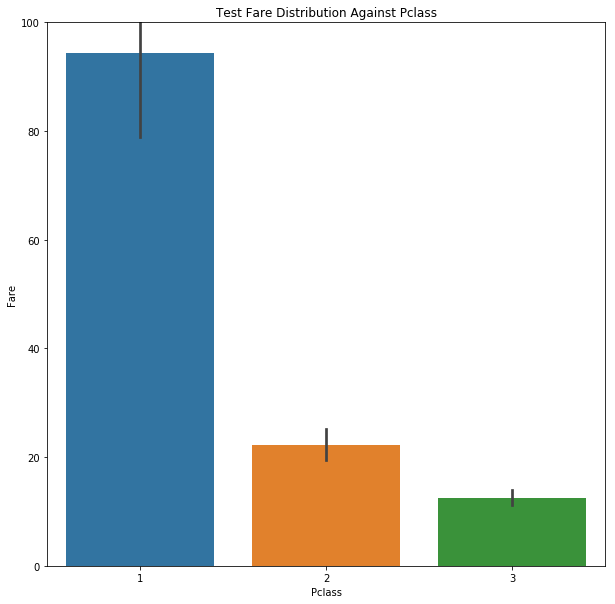

In [24]:
plt.figure(figsize=(10,10))
sns.barplot(x = "Pclass", y = "Fare", data = test)
plt.ylim(0,100)
plt.title('Test Fare Distribution Against Pclass')

### Finding: Fare is related to class. As expected, first class passengers are more likely to have a higher fare compared to second and third class. Pclass will be used to fill in fare nulls.

In [25]:
#No Fare nulls here.
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [26]:
#One Fare null.
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [27]:
#Fare null is filled in by grouping the data according to pclass abd then taking the median fare.
#median used in order to avoid effect of outliers skewing the data.

test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform('median'), inplace = True)

In [28]:
#Fare null is removed.

test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

## Cabin Nulls

In [29]:
#The below code extracts the first letter of the cabin data value string.

for d in train_test:
    d['Cabin'] = d.Cabin.str[:1]

In [30]:
#Below is a function defined to plot the abundance of cabin types
#in each class. A new dataframe called cab_pcla is created consisting
#of each series containing values of a specific class and cabin type
#value counts.

def cabinDist(d):
    firstClassTT = d[d['Pclass'] == 1]['Cabin'].value_counts()
    secondClassTT = d[d['Pclass'] == 2]['Cabin'].value_counts()
    thirdClassTT = d[d['Pclass'] == 3]['Cabin'].value_counts()

    cab_pclaTT = pd.DataFrame([firstClassTT, secondClassTT, thirdClassTT])

    cab_pclaTT.index = ['First Class', 'Second Class', 'Third Class']

    cab_pclaTT.plot(kind = 'bar', figsize = (10,10), fontsize=14)
    
    plt.ylabel('Count', fontsize = 14)

Text(0.5, 1.0, 'Train Cabin Distribution Against Pclass')

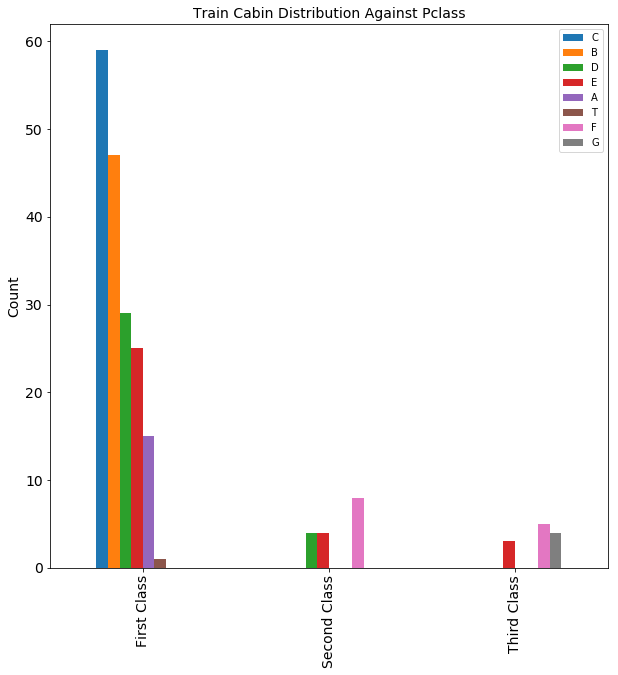

In [31]:
#cabinDist() called to display the cabin type distribution against class.

cabinDist(train)
plt.title('Train Cabin Distribution Against Pclass', fontsize=14)

Text(0.5, 1.0, 'Test Cabin Distribution Against Pclass')

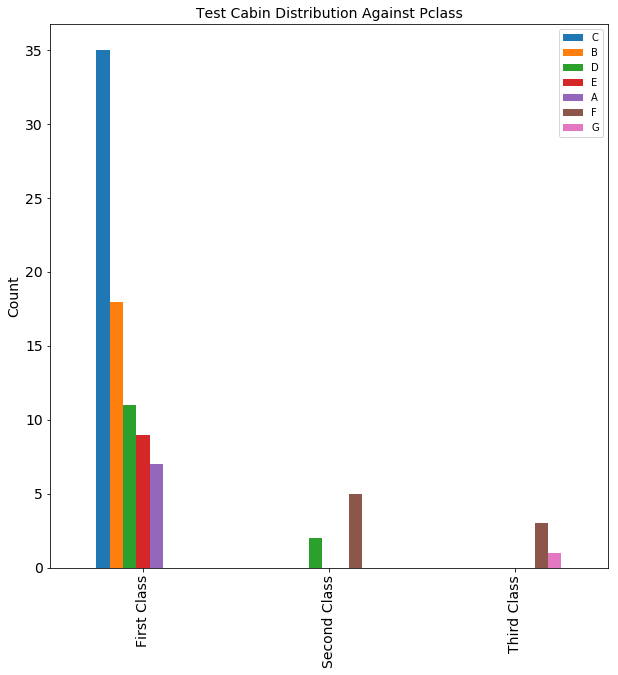

In [32]:
cabinDist(test)
plt.title('Test Cabin Distribution Against Pclass', fontsize = 14)

### Finding: There is a different distribution between class and cabins. For example, most first class passengers were in a C or B cabin whereas second and third class passengers were either in a D, E, F, or G cabin. Therefore, pclass will be used to fill in cabin nulls.

In [33]:
#Here, the cabin types are being mapped to numerical values. This is so that the 
#later analyses will be easier since all data will be in a numerical form.

cabin_map = {"A":1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8}

#Within this loop, the numerical values are mapped to the cabin types and the
#cabin nulls are filled in by taking the median cabin for each group belonging 
#to a given class.

for d in train_test:
    d['Cabin'] = d['Cabin'].map(cabin_map)
    d["Cabin"].fillna(d.groupby("Pclass")["Cabin"].transform("median"), inplace = True)

In [34]:
#Cabin nulls are removed.

train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Title          0
dtype: int64

In [35]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

## Embarked Nulls

In [36]:
#Below is a function defined to plot the amount of instances in which 
#a given passenger from a specific class boarded from a given location.
#A new dataframe called emb_plca is created consisting
#of each series containing values of a specific class and embarkation site
#value counts.

def embarDist(d):
    firstClassTT = d[d['Pclass'] == 1]['Embarked'].value_counts()
    secondClassTT = d[d['Pclass'] == 2]['Embarked'].value_counts()
    thirdClassTT = d[d['Pclass'] == 3]['Embarked'].value_counts()

    emb_pclaTT = pd.DataFrame([firstClassTT, secondClassTT, thirdClassTT])

    emb_pclaTT.index = ['First Class', 'Second Class', 'Third Class']

    emb_pclaTT.plot(kind = 'bar', figsize = (10,10), fontsize=14)
    
    plt.ylabel('Count', fontsize = 14)

Text(0.5, 1.0, 'Train Embarkation Site Against Class')

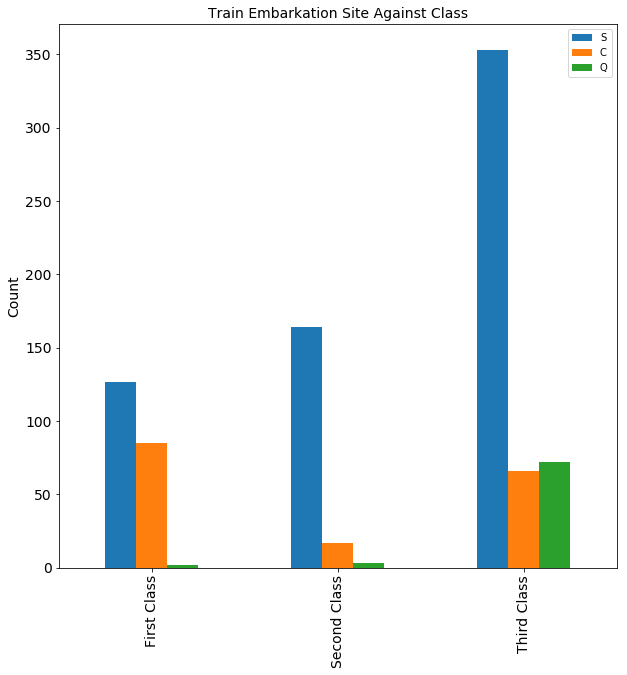

In [37]:
#embarDist() called to display the embarkation site distribution against class.

embarDist(train)
plt.title('Train Embarkation Site Against Class', fontsize = 14)

Text(0.5, 1.0, 'Test Embarkation Site According to Class')

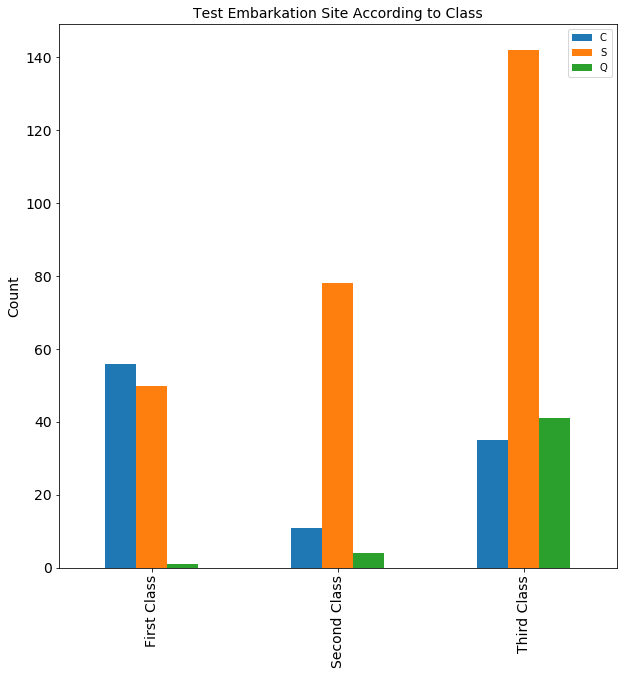

In [38]:
embarDist(test)
plt.title('Test Embarkation Site According to Class', fontsize = 14)

### Finding: Since the majority of passengers across classes boarded from Southampton, S will be used to fill in embarked null values.

In [39]:
#Embarked nulls are filled in with 'S'.

for d in train_test:
    d['Embarked'] = d['Embarked'].fillna('S')

In [40]:
#Embarked nulls are removed.

train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [41]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

## Data is now clean of nulls.

In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,6.0,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,3.0,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,6.0,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,3.0,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,6.0,S,Mr


## Mapping

#### Now that nulls are taken care of, the following lines of code will map each string value to a numerical value to make subsequent analyses easier.

## Sex Map

In [43]:
sex_map = {"male": 0, "female": 1}

for d in train_test:
    d['Sex'] = d['Sex'].map(sex_map)

## Embarked Map

In [44]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [45]:
embarked_map = {"S": 0, "C":1, "Q": 2}

for d in train_test:
    d['Embarked'] = d['Embarked'].map(embarked_map)

## Title Map

In [46]:
title_map = {"Mr": 0, "Miss": 1, "Mrs": 2, "Other": 3}

for d in train_test:
    d['Title'] = d['Title'].map(title_map)

## Additional Modifications

In [47]:
#The only non-numerical columns left are name and ticket.

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,6.0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,3.0,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,6.0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,3.0,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,6.0,0,0


In [48]:
#Given the distribution of tickets across the dataframe, it doesn't seem like it'll
#be useful in predicting survival. 

train.Ticket.value_counts()

347082              7
1601                7
CA. 2343            7
347088              6
3101295             6
CA 2144             6
382652              5
S.O.C. 14879        5
349909              4
LINE                4
347077              4
113781              4
4133                4
17421               4
PC 17757            4
113760              4
W./C. 6608          4
2666                4
19950               4
371110              3
PC 17760            3
PC 17572            3
248727              3
PC 17755            3
230080              3
24160               3
110152              3
PC 17582            3
347742              3
345773              3
                   ..
2700                1
35851               1
SOTON/O2 3101287    1
113767              1
349214              1
347085              1
349233              1
330958              1
113055              1
244310              1
350029              1
113783              1
28425               1
350034              1
347073    

In [49]:
#PassengerId, Name, and Ticket are all dropped because they are not 
#useful in predicting survival. Axis is provided to denote that columns
#are being dropped. The new dataframe is then assigned to cleanTrain.

cleanTrain = train.drop(['PassengerId','Name','Ticket'], axis = 1)
cleanTrain

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,6.0,0,0
1,1,1,1,38.0,1,0,71.2833,3.0,1,2
2,1,3,1,26.0,0,0,7.9250,6.0,0,1
3,1,1,1,35.0,1,0,53.1000,3.0,0,2
4,0,3,0,35.0,0,0,8.0500,6.0,0,0
5,0,3,0,30.0,0,0,8.4583,6.0,2,0
6,0,1,0,54.0,0,0,51.8625,5.0,0,0
7,0,3,0,2.0,3,1,21.0750,6.0,0,3
8,1,3,1,27.0,0,2,11.1333,6.0,0,2
9,1,2,1,14.0,1,0,30.0708,5.5,1,2


In [50]:
cleanTest = test.drop(['PassengerId','Name', 'Ticket'], axis = 1)

# Data Visualization and Analyses 

In [51]:
#This function was defined to plot the amount of passengers that
#survived and died grouped by different factors such as class,sex,
#title, and others. 
#A new dataframe called emb_plca is created consisting
#of each series containing values of a specific class and embarkation site
#value counts.

def graph(factor):
    lived = train[train['Survived'] == 1][factor].value_counts()
    died = train[train['Survived'] == 0][factor].value_counts()
    both = pd.DataFrame([lived, died])
    both.index = ['Survived', 'Dead']
    both.plot(kind = 'bar', stacked = True, figsize = (10,10), fontsize=14)
    plt.ylabel('Count', fontsize=14)

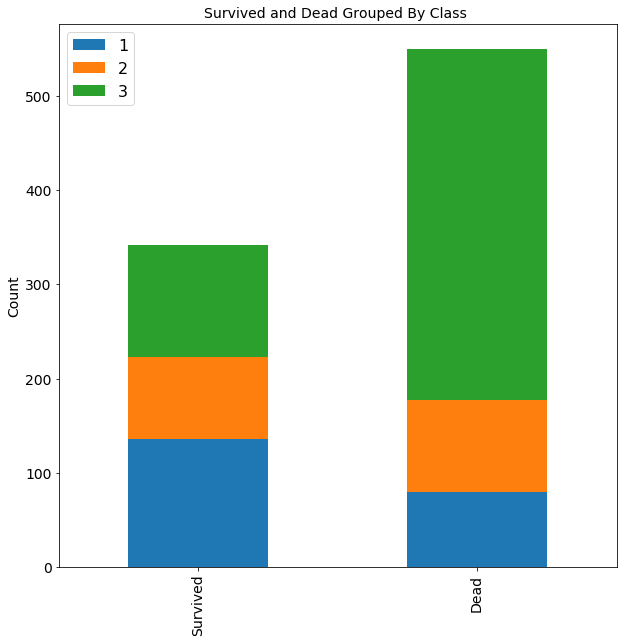

In [52]:
#Function called to determine how many passengers of a given class survived
#or died.

graph('Pclass')
plt.title('Survived and Dead Grouped By Class ', fontsize = 14)
plt.legend(prop={'size': 16})

### Finding: Most of those who died were from third class. More first class passengers survived than died.

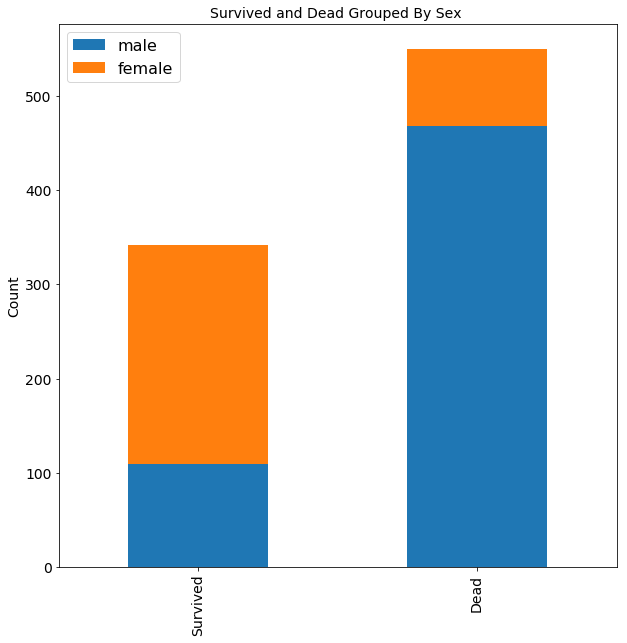

In [53]:
#Function called to determine how many passengers of a given sex survived
#or died.

graph('Sex')
plt.title('Survived and Dead Grouped By Sex ', fontsize = 14)
plt.legend(['male','female'], loc='upper left', prop={'size': 16})

### Finding: Most dead were males while most to survive were females.

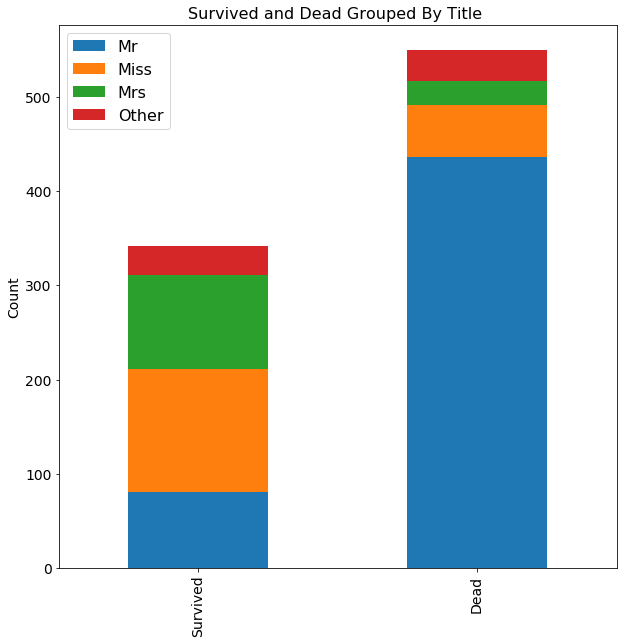

In [54]:
##Function called to determine how many passengers of a given title survived
#or died.

graph('Title')
plt.title('Survived and Dead Grouped By Title ', fontsize = 16)
plt.legend(['Mr','Miss','Mrs','Other'], loc='upper left',prop={'size': 16})

### Finding: Most of those who died had the title 'Mr' while most who survived 'Miss' or 'Mrs.' This supports the conclusion that more males died while more females survived.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Age')

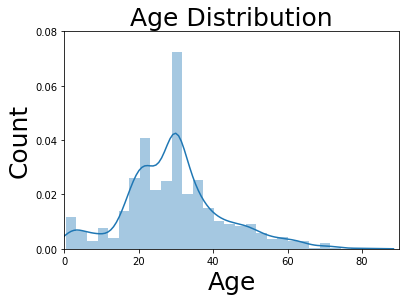

In [55]:
#The distplot() shows the age distribution among all passengers.
#Font size and size of graph are set below.

sns.distplot(train.Age)
sns.set(font_scale=2)
plt.rcParams['figure.figsize']=(20,20)
plt.title('Age Distribution', fontsize = 25)
plt.ylabel('Count', fontsize = 25)
plt.ylim(0,0.08)
plt.xlim(0,90)
plt.xlabel('Age', fontsize = 25)

In [56]:
#The following code bins the ages of passengers by 10.
#A new column is created called binAge containing these
#bins.

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
binAge = pd.cut(train.Age, bins)
train['binAge'] = binAge

In [57]:
#ageAlive contains the age bins along with the amount of passengers who survived
#at the given age.

ageAlive = train[train['Survived'] == 1]['binAge'].value_counts().sort_index()
ageAlive

(0, 10]      40
(10, 20]     44
(20, 30]    120
(30, 40]     83
(40, 50]     33
(50, 60]     17
(60, 70]      4
(70, 80]      1
Name: binAge, dtype: int64

Text(0, 0.5, 'Count')

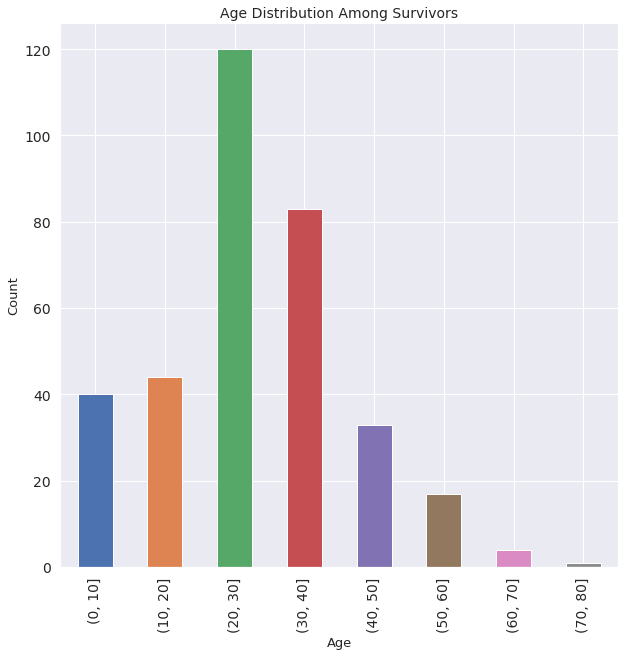

In [58]:
#The following plots the age distribution of survivors.

ageAlive.plot.bar(figsize=(10,10), fontsize=14)
plt.title('Age Distribution Among Survivors', fontsize = 14)
plt.xlabel('Age', fontsize = 13)
plt.ylabel('Count', fontsize = 13)

### Finding: Most passengers who survived were between the ages of 20-40.

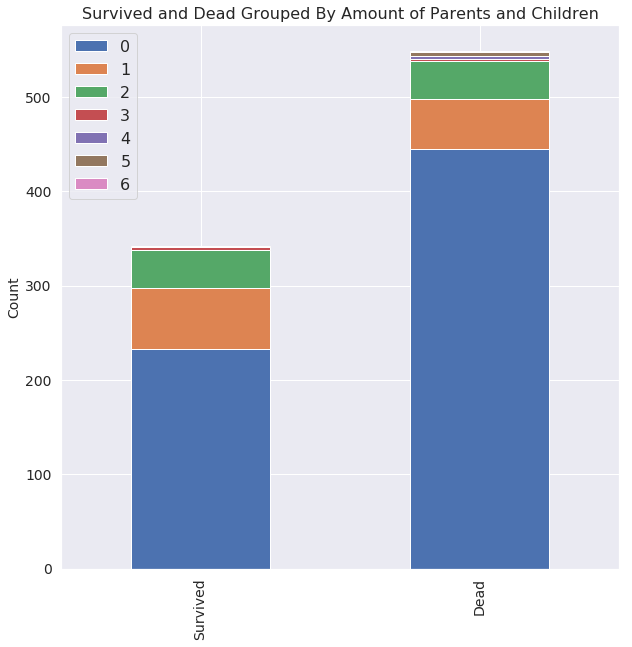

In [59]:
#Function called to determine how many passengers who have a certain amount of parents 
#and children on boat survived or died.

graph('Parch')
plt.title('Survived and Dead Grouped By Amount of Parents and Children', fontsize = 16)
plt.legend(loc='upper left', prop={'size': 16})

### Finding: More people who had no parents or children on board were more likely to die than others who had parents and children on board.

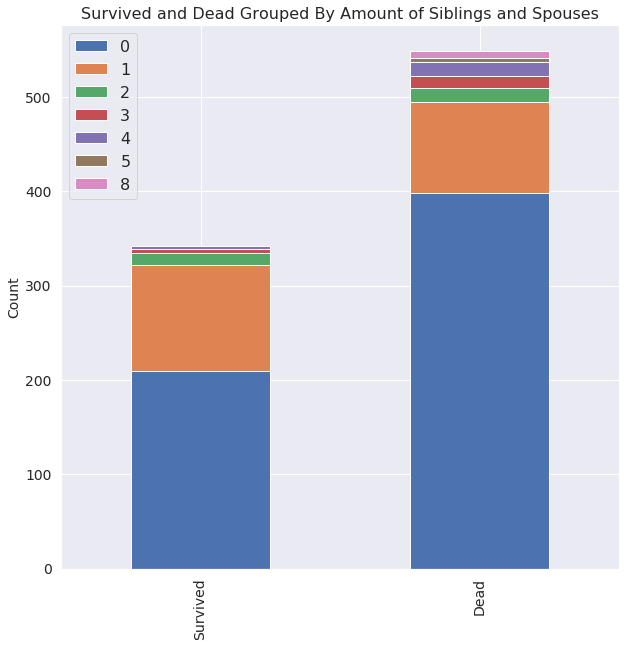

In [60]:
#Function called to determine how many passengers who have a certain amount of siblings
#and spouses on the boat survived or died.

graph('SibSp')
plt.title('Survived and Dead Grouped By Amount of Siblings and Spouses', fontsize = 16)
plt.legend(loc='upper left', prop={'size': 16})

### Finding: Passengers with no siblings or spouses on board were more likely to die than those who had siblings and spouses.

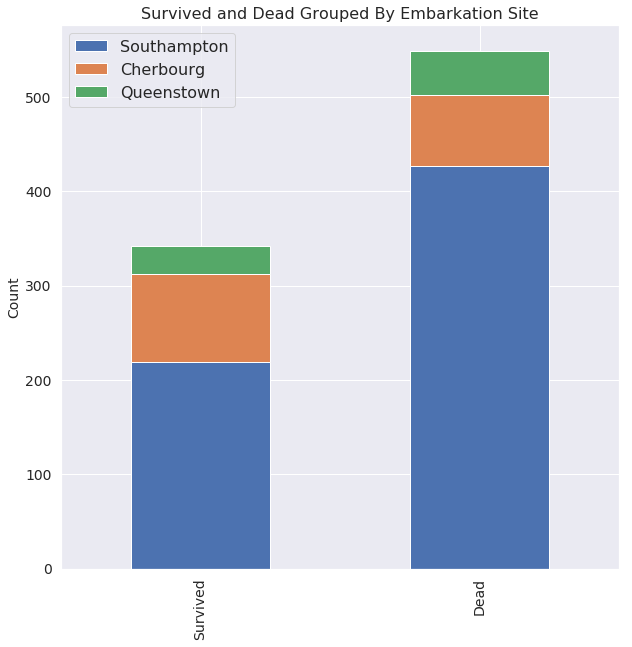

In [61]:
#Function called to determine how many passengers who embarked at a certain site 
#survived or died.

graph('Embarked')
plt.title('Survived and Dead Grouped By Embarkation Site', fontsize = 16)
plt.legend(['Southampton', 'Cherbourg', 'Queenstown'],loc='upper left', prop={'size': 16})

### Finding: Most dead boarded the boat from Southampton.

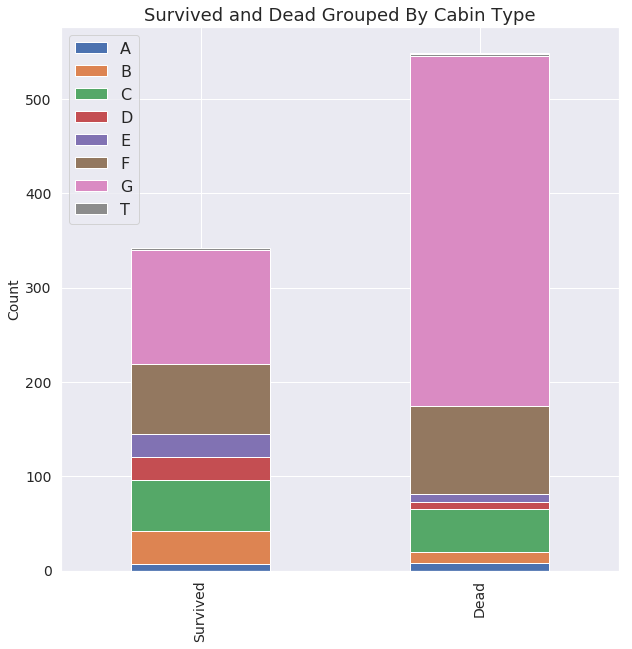

In [62]:
#Function called to determine how many passengers who stayed in a certain cabin
#survived or died.

graph('Cabin')
plt.title('Survived and Dead Grouped By Cabin Type', fontsize = 18)
plt.legend(['A','B','C','D','E','F','G','T'],loc='upper left', prop={'size': 16})

### Finding: Most dead were living in the G type cabin.

In [63]:
#The following provides descriptive statistics on the Fare column.

train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [64]:
#The following code bins the fares of passengers.
#A new column is created called binFare containing these
#bins.

binsFare = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,200, 300, 400,500,600]
binFare = pd.cut(train.Fare, binsFare)
train['binFare'] = binFare

In [65]:
#The following code provides the amount of passengers who surived grouped into the
#corresponding bin of the fare they paid.

fareAlive = train[train['Survived'] == 1]['binFare'].value_counts().sort_index()

Text(0, 0.5, 'Count')

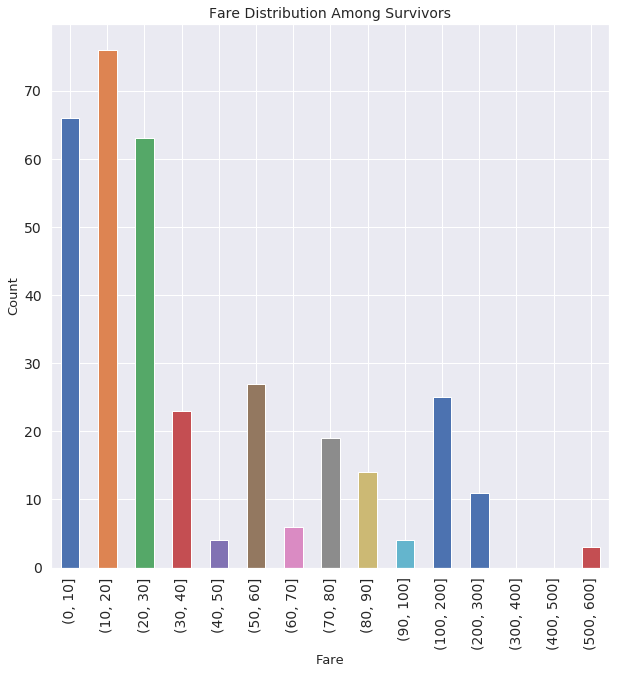

In [66]:
#Below is a plot of the fare distribution among survivors.

fareAlive.plot.bar(figsize=(10,10), fontsize=14)
plt.title('Fare Distribution Among Survivors', fontsize = 14)
plt.xlabel('Fare', fontsize = 13)
plt.ylabel('Count', fontsize = 13)

### Finding: Most survivors paid between 0 and 30.

## Additional Visuals

Text(0.5, 1.0, 'Correlation Among Columns')

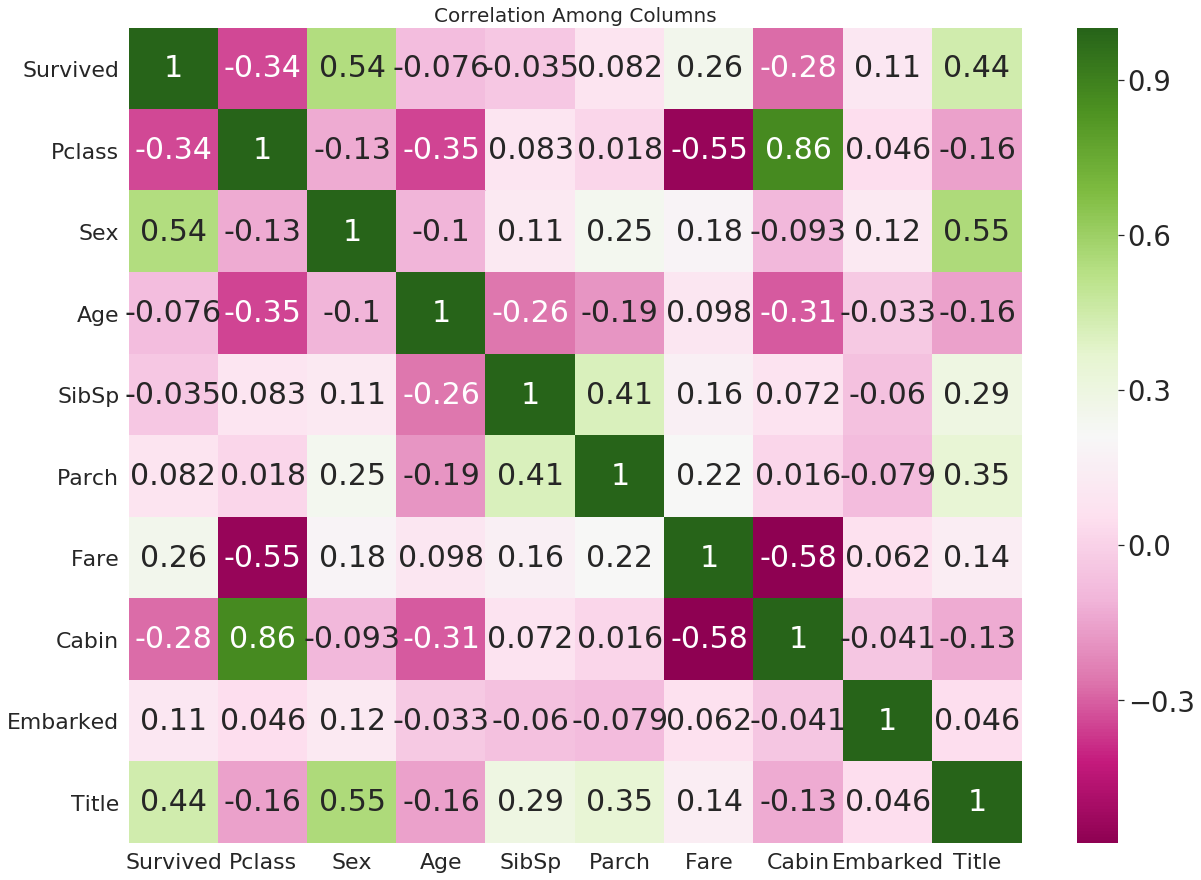

In [67]:
#Below is a heatmap which plots the correlation of the columns.

plt.subplots(figsize=(20,15))
sns.set(font_scale=2.5)
sns.heatmap(cleanTrain.corr(),annot=True,cmap='PiYG')
plt.title('Correlation Among Columns', fontsize=20)

### Finding: It is important to consider the 'Survived' column. The most positive correlation in this column comes from sex and title. The most negative correlation in this column comes from class and cabin. This reveals that females were more likely to have survived whereas third class passengers were likely to have died. There is also a positive association between class and cabin. 

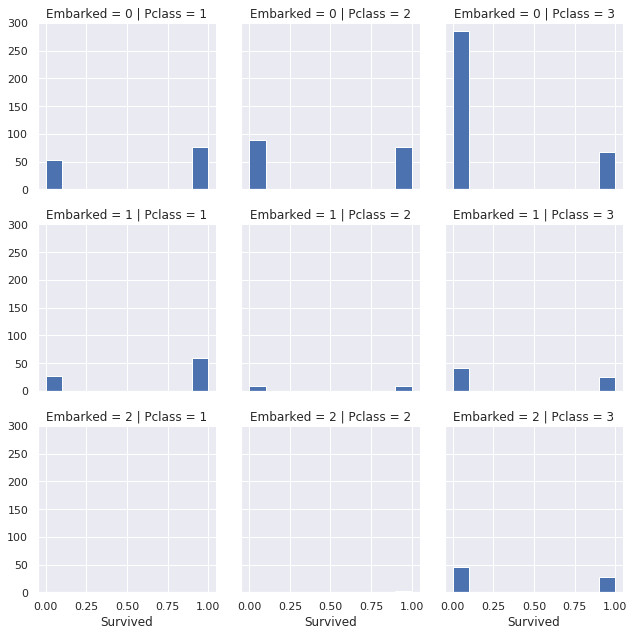

In [68]:
#The following plots are histograms relating Class and Embarkation site.

sns.set(font_scale=1)
sns.FacetGrid(data = train, row = 'Embarked', col='Pclass').map(plt.hist, "Survived")

### Finding: Most survivors boarded from Southampton across classes.The least survivors boarded from Queenstown.

In [69]:
#The 'Survived' column is dropped in order to prepare the data for submission.

cleanTrain = cleanTrain.drop(['Survived'], axis=1)

# Prediction

In [70]:
cleanTrain.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,0,22.0,1,0,7.2500,6.0,0,0
1,1,1,38.0,1,0,71.2833,3.0,1,2
2,3,1,26.0,0,0,7.9250,6.0,0,1
3,1,1,35.0,1,0,53.1000,3.0,0,2
4,3,0,35.0,0,0,8.0500,6.0,0,0


In [71]:
cleanTest.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,0,34.5,0,0,7.8292,6.0,2,0
1,3,1,47.0,1,0,7.0000,6.0,0,2
2,2,0,62.0,0,0,9.6875,6.0,2,0
3,3,0,27.0,0,0,8.6625,6.0,0,0
4,3,1,22.0,1,1,12.2875,6.0,0,2


In [72]:
#LogisticRegression is imported. This is needed for prediction 
#modelling.

from sklearn.linear_model import LogisticRegression
lgcls = LogisticRegression()

In [73]:
#Here, the columns chosen from each dataframe 
#are the ones that I've found to
#most strongly predict survival or death.

#Dataframes are assigned to xtrain and xtest.

xtrain = cleanTrain[['Pclass','Sex','Cabin','Title']]
xtest = cleanTest[['Pclass','Sex','Cabin','Title']]

In [74]:
#ytrain is assigned the Survived series from the train dataset.

ytrain = train.Survived

In [75]:
#fit() fits the values from the xtrain dataframe and survival.

lgcls.fit(xtrain, ytrain)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [76]:
#predict() uses the relationship determined above using fit() to predict
#the values of survival for the test dataframe.

prediction = lgcls.predict(xtest)

In [77]:
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

# Submission

In [78]:
#This is the ID of the passengers in the test dataframe.

Id = test.PassengerId

In [79]:
#The submission dataframe is formatted to have two columns consisting of passenger IDs
#and the predicted survival values for the test dataframe.

submission = pd.DataFrame({'PassengerId': Id, 'Survived': prediction})
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [80]:
#This converts the dataframe into a csv file.

submission.to_csv("submission_linReg.txt", index = None)